In [348]:
import pandas as pd
import seaborn as sb # for visualization
import numpy as np
import matplotlib.pyplot as plt


# New Section

In [349]:
df = pd.read_csv("churn.csv")
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [350]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [351]:
sb.set_style(style="whitegrid")
plt.figure(figsize= (12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Churn')

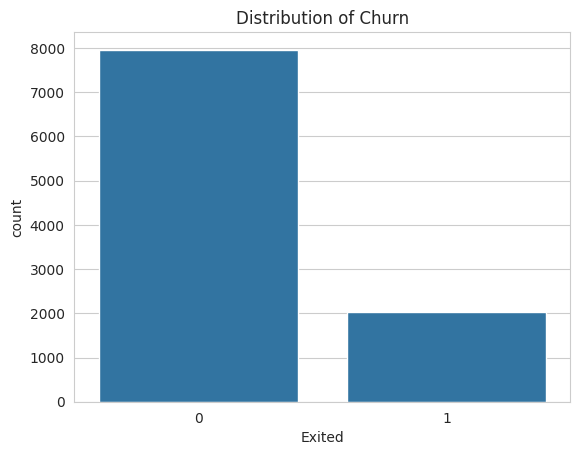

In [352]:
sb.countplot(x = "Exited", data = df)
plt.title("Distribution of Churn")

Text(0.5, 1.0, 'Age Distribution')

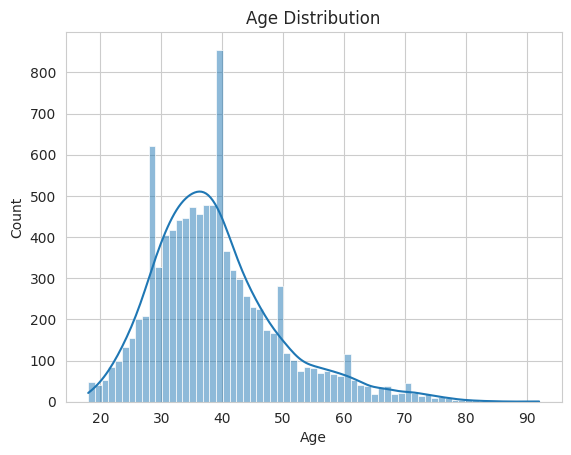

In [353]:
sb.histplot(data = df, x = "Age", kde = True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Credit Score vs Age')

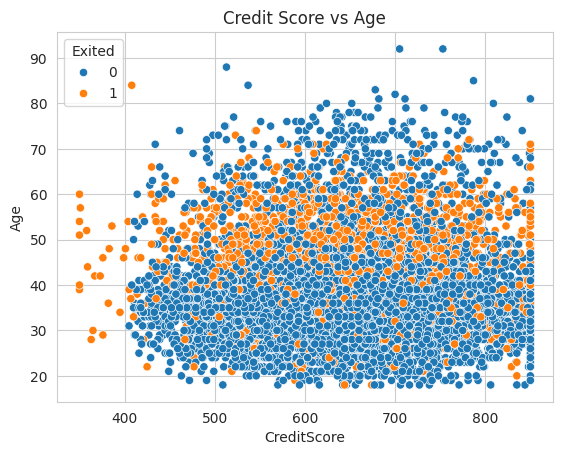

In [354]:
sb.scatterplot(data = df, x = "CreditScore", y = "Age", hue = "Exited")
plt.title("Credit Score vs Age")

Text(0.5, 1.0, 'Balance Distribution by churn')

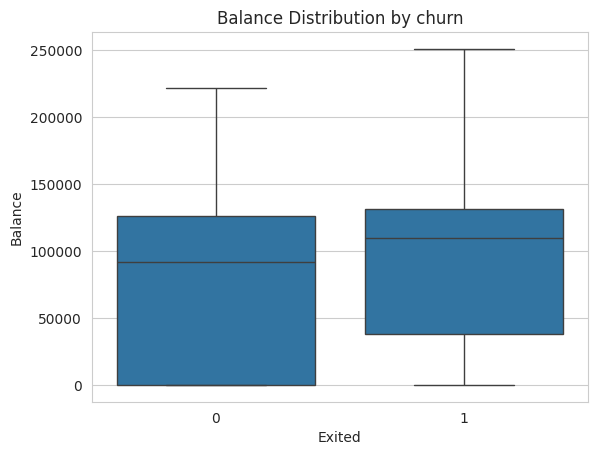

In [355]:
sb.boxplot(data = df, x = "Exited", y = "Balance")
plt.title("Balance Distribution by churn")

Text(0.5, 1.0, 'Credit Score Distribution by churn')

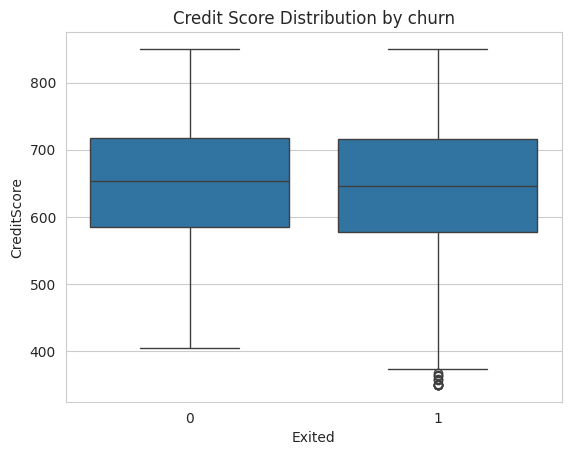

In [356]:
sb.boxplot(data = df, x = "Exited", y = "CreditScore")
plt.title("Credit Score Distribution by churn")

Text(0.5, 1.0, 'Number of Products and Churn rate')

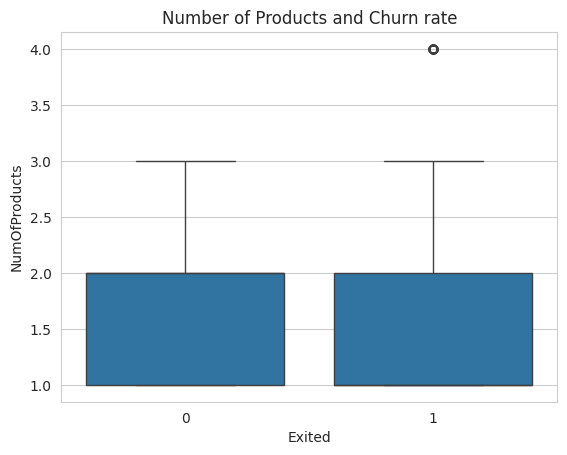

In [357]:
sb.boxplot(data = df, x = "Exited", y = "NumOfProducts")
plt.title("Number of Products and Churn rate")

Text(0.5, 1.0, 'Churn Rate by Number of Products and Balance')

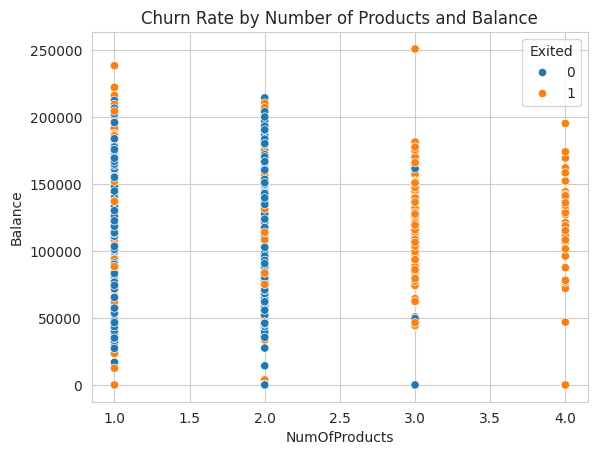

In [358]:
sb.scatterplot(data = df, x = "NumOfProducts", y = "Balance", hue = "Exited")
plt.title("Churn Rate by Number of Products and Balance")


Text(0.5, 1.0, 'Balance vs Age')

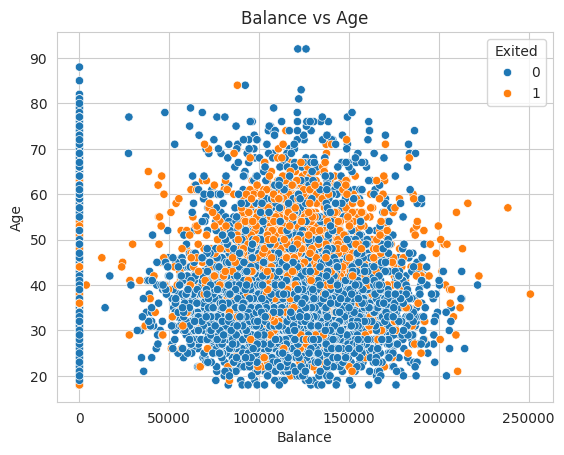

In [359]:
sb.scatterplot(data = df, x = "Balance", y = "Age", hue = "Exited")
plt.title("Balance vs Age")


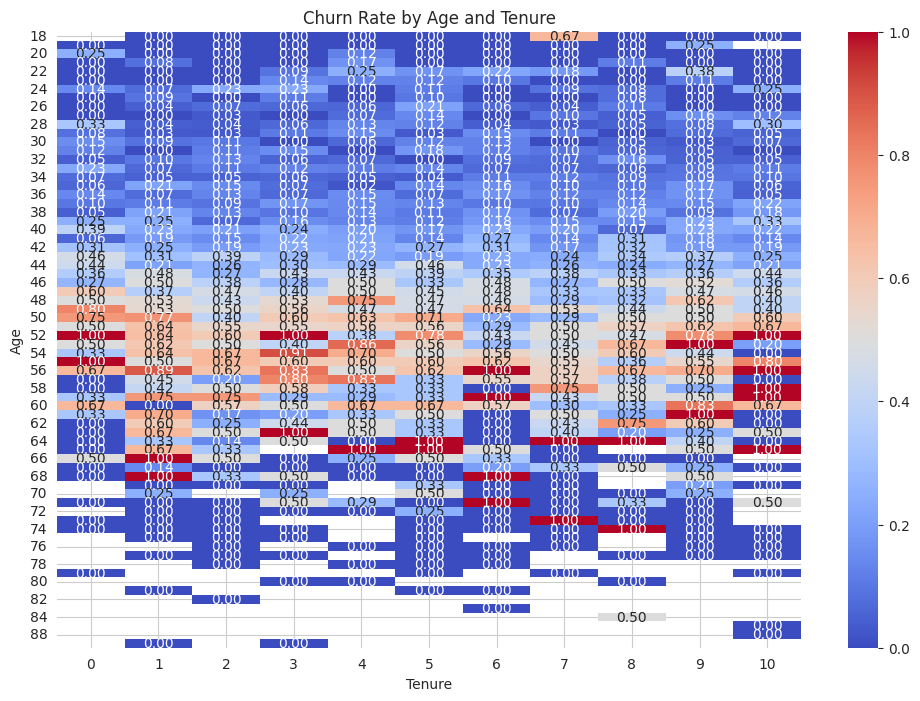

In [360]:
pivot_table = df.pivot_table('Exited', index='Age', columns='Tenure', aggfunc='mean')
plt.figure(figsize=(12, 8))
sb.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Churn Rate by Age and Tenure')
plt.show()


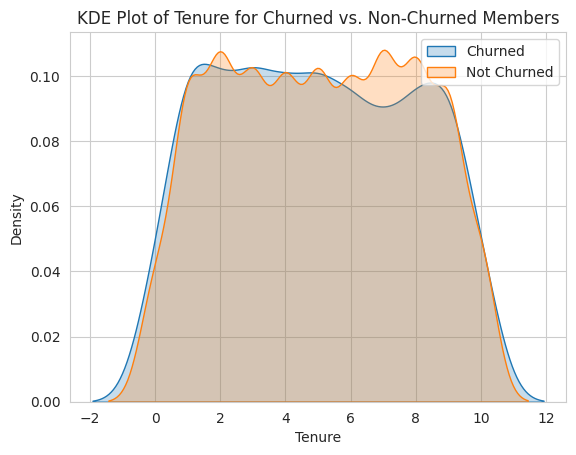

In [361]:
sb.kdeplot(df[df['Exited'] == 1]['Tenure'], label='Churned', fill=True)
sb.kdeplot(df[df['Exited'] == 0]['Tenure'], label='Not Churned', fill=True)

plt.title('KDE Plot of Tenure for Churned vs. Non-Churned Members')
plt.legend()
plt.show()


In [362]:
features = df.drop("Exited", axis=1)
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [363]:
target = df['Exited']#Exclude the value that the ML is trying to predict, here we are predicting if the customer exited (churned) from the bank
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [364]:
features = features.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)# Drop any columns that won't be factors for your dataset
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [365]:
features = features.dropna()# Drop any missing values
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [366]:
features = pd.get_dummies(features, columns=["Geography", "Gender"])#Turn alphabetical values into binary numerical values
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [367]:
#Data splits 80:20 is most common but we can split in other ways depending on the data
from sklearn.model_selection import train_test_split


In [368]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state= 42) # 80:20 training split

In [369]:
from sklearn.preprocessing import StandardScaler

In [370]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [371]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [372]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [373]:
X_train[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 , -0.99850112,  1.72572313,
       -0.57638802, -0.91324755,  0.91324755])

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [375]:
lr_model = LogisticRegression(random_state = 42)

In [376]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [377]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [378]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.811

In [379]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

    print(f"\nClassification Report:\n{classification_report(y_test,y_pred)}")
    print("------")

    with open(filename, "wb") as file:
      pickle.dump(model, file)

      print(f"Model saved as: {filename}")

In [380]:
xgb_model = xgb.XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model = SVC(random_state = 42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

XGBClassifier Accuracy: 0.7455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

------
Model saved as: xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7850

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

------
Model saved as: dt_model.pkl
RandomForestClassifier Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96  

In [382]:
feature_importance = xgb_model.feature_importances_
feature_names = features.columns

In [383]:
feature_importance

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646328, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [384]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [385]:
feature_importances_df =  pd.DataFrame({
    "features" : feature_names,
    "importance": feature_importance
})

In [386]:
feature_importances_df # Gradient Boosting

,features,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [387]:
feature_importance_rf = rf_model.feature_importances_

In [388]:
feature_importances_rf_df =  pd.DataFrame({
    "features" : feature_names,
    "importance": feature_importance_rf
})

In [389]:
feature_importances_rf_df = feature_importances_rf_df.sort_values("importance", ascending = False)

In [390]:
feature_importances_rf_df  # Random Forest

,features,importance
1,Age,0.241642
7,EstimatedSalary,0.145578
0,CreditScore,0.142544
3,Balance,0.139673
4,NumOfProducts,0.130713
2,Tenure,0.083717
6,IsActiveMember,0.038542
9,Geography_Germany,0.021320
5,HasCrCard,0.018347
12,Gender_Male,0.010378


In [391]:
feature_importances_df = feature_importances_df.sort_values("importance", ascending = False)


In [392]:
feature_importances_df

,features,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


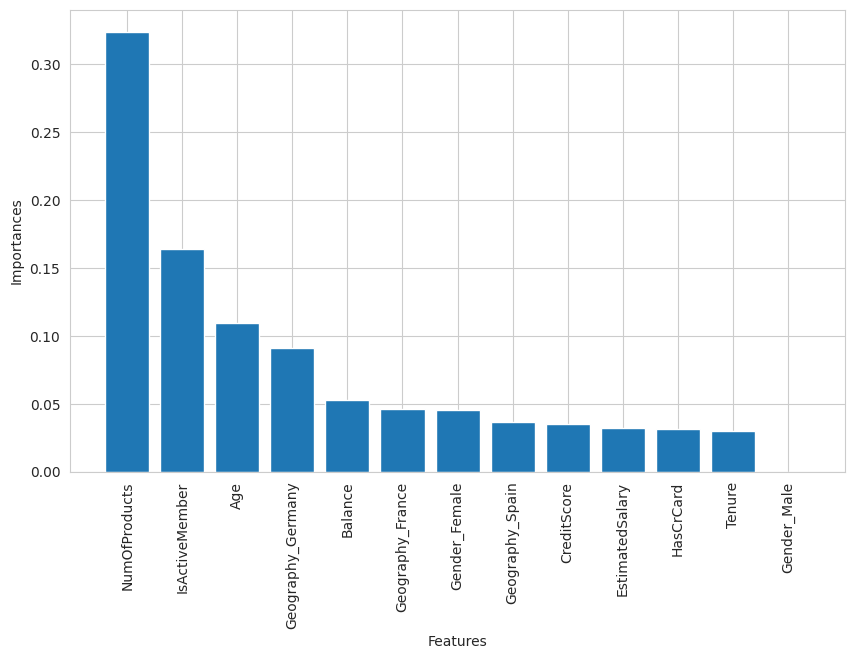

In [394]:
plt.figure(figsize =(10,6))
plt.bar(feature_importances_df["features"], feature_importances_df["importance"])
plt.xticks(rotation = 90)

plt.xlabel("Features")
plt.ylabel("Importances")
plt.tight_layout
plt.show()

In [395]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [396]:
features['CLV'] = df['Balance'] * df["EstimatedSalary"]/100000

In [397]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344


In [398]:
features['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30 ,45, 60, 100], labels=['Young', 'MiddleAge', 'Senior', 'Elderly'])

In [399]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge


In [400]:
features['TenureAgeRatio'] =df['Tenure']/df['Age']

In [401]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429


In [402]:
features['LogProductToBalanceRatio'] = np.log1p(df['NumOfProducts']) - np.log1p(df['Balance'] + 1)

In [404]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio,LogProductToBalanceRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390,-10.643159
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476,-10.594525
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641,0.405465
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512,-11.047016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205,0.405465
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714,-10.264158
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429,-10.127661


In [405]:
features['ProductGroup'] = pd.cut(df['NumOfProducts'], bins=[0, 2, 4], labels=['LessProducts', 'MoreProducts'])

In [406]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio,LogProductToBalanceRatio,ProductGroup
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619,0.000000,LessProducts
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390,-10.643159,LessProducts
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476,-10.594525,MoreProducts
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641,0.405465,LessProducts
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512,-11.047016,LessProducts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205,0.405465,LessProducts
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714,-10.264158,LessProducts
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444,0.000000,LessProducts
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429,-10.127661,LessProducts


In [407]:
features = pd.get_dummies(features, drop_first=True)

In [408]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,LogProductToBalanceRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly,ProductGroup_MoreProducts
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,0.000000,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,0.024390,-10.643159,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,0.190476,-10.594525,True,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,0.405465,True,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,0.046512,-11.047016,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,0.405465,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,0.285714,-10.264158,True,False,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,0.000000,True,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,0.071429,-10.127661,True,False,False,False


In [409]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [410]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,LogProductToBalanceRatio,AgeGroup_MiddleAge,AgeGroup_Senior,AgeGroup_Elderly,ProductGroup_MoreProducts
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,0.405465,True,False,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,234438.927360,0.095238,-10.593518,True,False,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,98551.287635,0.125000,-10.957294,False,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,207633.662148,0.333333,-11.124605,False,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,56131.190581,0.160714,-11.171486,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,48367.430996,0.148148,-10.459020,False,True,False,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,0.000000,False,True,False,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,0.693147,True,False,False,True
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,185487.067788,0.186047,-11.462839,True,False,False,False


In [411]:
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featuresEngineer.pkl")# accuracy boosted from 84 to 86
#Precision = 88 to 89 for non churned, 39 to 72 for churned Recall = 80 to 95 for non churned, 54 to 52 for churned F1 = non churned: 83 to 92 churned: 45 to 60

XGBClassifier Accuracy: 0.8655

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.72      0.52      0.60       393

    accuracy                           0.87      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

------
Model saved as: xgboost-featuresEngineer.pkl


In [412]:
from imblearn.over_sampling import SMOTE

In [413]:
smote = SMOTE(random_state = 42)

In [414]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [415]:
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")
#original accuracy: 84 new 86


XGBClassifier Accuracy: 0.8600

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

------
Model saved as: xgboost-SMOTE.pkl


In [416]:
#ensembling
from sklearn.ensemble import VotingClassifier

In [417]:
voting_clf = VotingClassifier(estimators=[('xgboost', xgb.XGBClassifier(random_state=42)), ('rf', RandomForestClassifier(random_state=42)),('svm', SVC(random_state=42, probability = True))], voting = 'soft')

In [418]:
#voting soft means that voting classifier will weigh predicitions of individual models by accuracy
#hard means it will take the majority vote

In [419]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")

VotingClassifier Accuracy: 0.8595

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

------
Model saved as: voting_clf.pkl


In [420]:
#Trying Gradient Classfier on its own
model_gb = GradientBoostingClassifier(random_state=42)

model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [421]:
y_pred = model_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8655

In [422]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [423]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [424]:
y_pred = model_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

In [425]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1607
           1       0.48      0.18      0.26       393

    accuracy                           0.80      2000
   macro avg       0.65      0.57      0.57      2000
weighted avg       0.76      0.80      0.76      2000



In [426]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [427]:
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.77

In [428]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1607
           1       0.27      0.10      0.15       393

    accuracy                           0.77      2000
   macro avg       0.54      0.52      0.51      2000
weighted avg       0.70      0.77      0.73      2000



In [429]:
import lightgbm as lgbm

In [430]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1552
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier()

In [431]:
y_pred = model_lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8625

In [432]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.72      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [433]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [434]:
y_pred = model_dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.777

In [435]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



In [436]:
#Stacking Classifier w Extreme Gradient Boost, Gradient Boosting, and RandomForest
base_estimators = [
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(random_state=42)
)


stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy, classification_report(y_test, y_pred))

0.867               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [437]:
#Stacking Classifier w Extreme Gradient Boost, SVC Boosting, and RandomForest
base_estimators_1 = [
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('svm', SVC(random_state=42)),
    ('knn', KNeighborsClassifier())
]

stacking_model_1 = StackingClassifier(
    estimators=base_estimators_1,
    final_estimator=LogisticRegression(random_state=42)
)


evaluate_and_save_model(stacking_model_1, X_train, X_test, y_train, y_test, "stacking.pkl")

StackingClassifier Accuracy: 0.8660

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

------
Model saved as: stacking.pkl


In [438]:
voting_class = VotingClassifier(estimators=[
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
], voting='hard')

base_estimators_2 = [
    ('voting', voting_class),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

stacking_model_2 = StackingClassifier(
    estimators=base_estimators_2,
    final_estimator=LogisticRegression(random_state=42)
)


evaluate_and_save_model(stacking_model_2, X_train, X_test, y_train, y_test, "voting_and_stacking_top_class.pkl")


StackingClassifier Accuracy: 0.8635

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------
Model saved as: voting_and_stacking_top_class.pkl


In [440]:
voting_class = VotingClassifier(estimators=[
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard')

base_estimators_3 = [
    ('voting', voting_class),
    ('svm', SVC()),
    ('knn', KNeighborsClassifier())

]

stacking_model_3 = StackingClassifier(
    estimators=base_estimators_3,
    final_estimator=LogisticRegression(random_state=42)
)


evaluate_and_save_model(stacking_model_3, X_train, X_test, y_train, y_test, "voting_and_stacking.pkl")

StackingClassifier Accuracy: 0.8650

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

------
Model saved as: voting_and_stacking.pkl
